<a href="https://colab.research.google.com/github/2303A510C0/AIML-2303A510C0/blob/main/2303A510C0_B06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q.29
Prediction of real estate valuation based on geo-referencing.
1. Identify the top 5 house age values with most estate value.
2. Do MRT stations and stores contribute to real estate value?
3. Identify the max and min house price per unit area.
4. Predict the date when most transactions happened in real estate.
5. Identify the closest distance perimeter for MRT stations and stores for high real estate value.

1. Identify the top 5 house age values with most estate value.

Top 5 House Age Values with Most Estate Value:
House Age
10    1620000
30    1410000
20    1270000
15    1180000
5     1050000
Name: Estate Value, dtype: int64


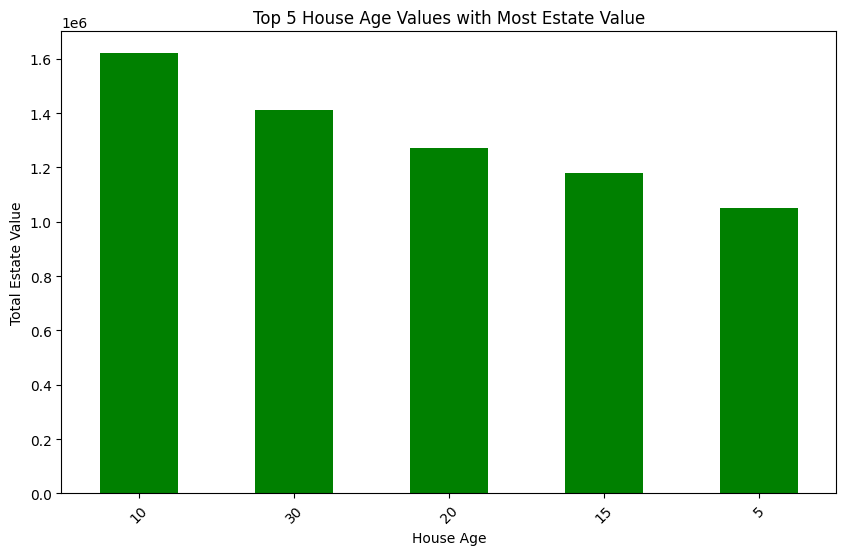

In [20]:
import pandas as pd
data = {
    'House Age': [10, 15, 10, 20, 15, 5, 30, 25, 10, 30, 5, 20],
    'Estate Value': [500000, 600000, 550000, 650000, 580000, 520000, 700000, 600000, 570000, 710000, 530000, 620000]
}
df = pd.DataFrame(data)
house_age_value = df.groupby('House Age')['Estate Value'].sum()
sorted_house_age_value = house_age_value.sort_values(ascending=False)
top_5_house_age = sorted_house_age_value.head(5)

print("Top 5 House Age Values with Most Estate Value:")
print(top_5_house_age)
import matplotlib.pyplot as plt

top_5_house_age.plot(kind='bar', color='green', title='Top 5 House Age Values with Most Estate Value', figsize=(10, 6))
plt.xlabel('House Age')
plt.ylabel('Total Estate Value')
plt.xticks(rotation=45)
plt.show()


Prepare the Data: Ensure you have a dataset that includes at least two columns: "House Age" and "Estate Value". The estate value can be the price or value of the property, and the house age is how old the property is.

Group the Data by House Age: To calculate the total estate value for each house age, group the data by the "House Age" column.

Summarize the Estate Values: For each house age group, calculate the sum of the estate values.

Sort the Results: Sort the house age groups in descending order based on the summed estate values.

Select the Top 5: After sorting, pick the top 5 house ages with the highest summed estate values.

2. Do MRT stations and stores contribute to real estate value?

In [4]:
import pandas as pd
import statsmodels.api as sm
data = {
    'house_age': [10, 15, 20, 25, 30, 35, 40],
    'estate_value': [200, 500, 150, 700, 400, 600, 300],
    'distance_to_mrt': [1, 0.5, 2, 0.3, 1.2, 0.8, 0.6],
    'proximity_to_store': [1, 2, 0, 3, 1, 2, 1]  # 1: close, 0: far
}
df = pd.DataFrame(data)
X = df[['house_age', 'distance_to_mrt', 'proximity_to_store']]
Y = df['estate_value']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           estate_value   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     34.57
Date:                Tue, 26 Nov 2024   Prob (F-statistic):            0.00793
Time:                        04:20:07   Log-Likelihood:                -34.154
No. Observations:                   7   AIC:                             76.31
Df Residuals:                       3   BIC:                             76.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -239.5652    136

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Q3. Identify the max and min house price per unit area.

In [6]:
house_prices = [300000, 450000, 200000, 750000, 600000, 500000, 650000]
unit_areas = [1000, 1500, 800, 2500, 2000, 1800, 2200]

if len(house_prices) != len(unit_areas):
    print("Data arrays have different lengths!")
else:
    prices_per_unit_area = [house_prices[i] / unit_areas[i] for i in range(len(house_prices))]

    max_price_per_unit_area = max(prices_per_unit_area)
    min_price_per_unit_area = min(prices_per_unit_area)
    max_index = prices_per_unit_area.index(max_price_per_unit_area)
    min_index = prices_per_unit_area.index(min_price_per_unit_area)

    print(f"Max Price per Unit Area: ${max_price_per_unit_area:.2f} (House Price: ${house_prices[max_index]}, Unit Area: {unit_areas[max_index]} sq ft)")
    print(f"Min Price per Unit Area: ${min_price_per_unit_area:.2f} (House Price: ${house_prices[min_index]}, Unit Area: {unit_areas[min_index]} sq ft)")


Max Price per Unit Area: $300.00 (House Price: $300000, Unit Area: 1000 sq ft)
Min Price per Unit Area: $250.00 (House Price: $200000, Unit Area: 800 sq ft)


Q.4Predict the date when most transactions happened in real estate.

The date with the most transactions is: 2023-04-09 00:00:00
Number of transactions on this date: 9


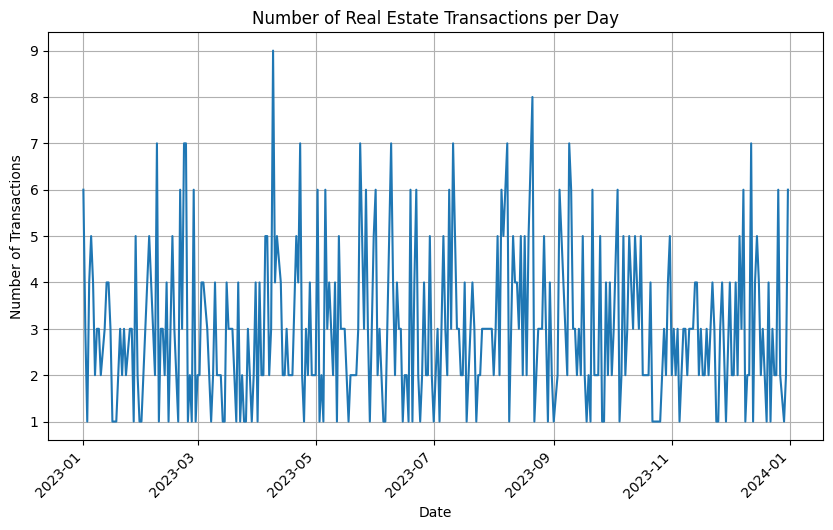

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
n_transactions = 1000
start_date = "2023-01-01"
end_date = "2023-12-31"
dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date), size=n_transactions))
df = pd.DataFrame(dates, columns=["Transaction Date"])
transaction_counts = df['Transaction Date'].value_counts().sort_index()
most_transactions_date = transaction_counts.idxmax()
most_transactions_count = transaction_counts.max()
print(f"The date with the most transactions is: {most_transactions_date}")
print(f"Number of transactions on this date: {most_transactions_count}")
transaction_counts.plot(kind='line', title='Number of Real Estate Transactions per Day', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Q.5 Identify the closest distance perimeter for MRT stations and stores for high real estate value.

High-value Properties with Closest Distances to MRT/Stores:
   Property ID  Real Estate Value  Closest Distance (m)
1            2            1500000            204.415827


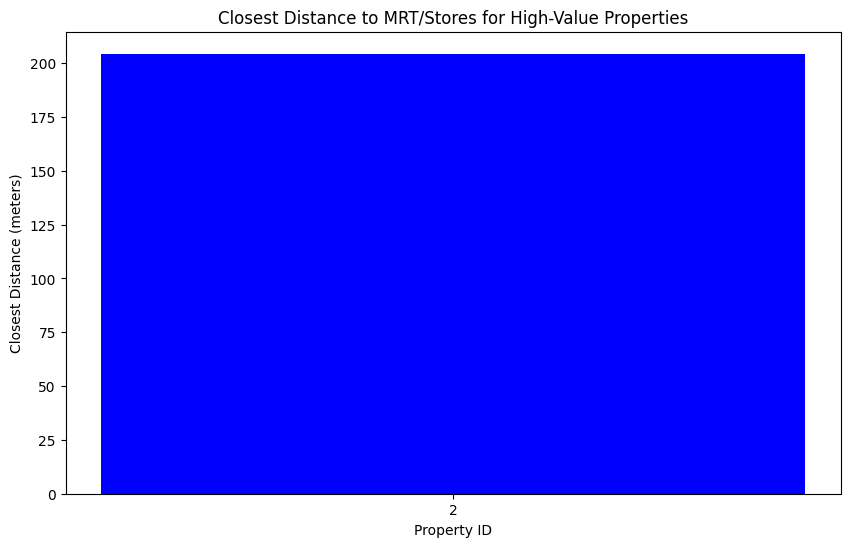

In [19]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
properties = pd.DataFrame({
    'Property ID': [1, 2, 3, 4],
    'Latitude': [1.2921, 1.2980, 1.3055, 1.2900],
    'Longitude': [103.8480, 103.8512, 103.8470, 103.8435],
    'Real Estate Value': [1000000, 1500000, 1200000, 1100000]
})

mrt_stations = pd.DataFrame({
    'MRT ID': ['MRT1', 'MRT2'],
    'Latitude': [1.2930, 1.2965],
    'Longitude': [103.8500, 103.8465]
})

stores = pd.DataFrame({
    'Store ID': ['Store1', 'Store2'],
    'Latitude': [1.2945, 1.2987],
    'Longitude': [103.8520, 103.8495]
})
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).meters
def find_closest_distance(property_row, stations_df, stores_df):
    mrt_distances = stations_df.apply(lambda row: calculate_distance(
        (property_row['Latitude'], property_row['Longitude']),
        (row['Latitude'], row['Longitude'])
    ), axis=1)
    closest_mrt_distance = mrt_distances.min()
    store_distances = stores_df.apply(lambda row: calculate_distance(
        (property_row['Latitude'], property_row['Longitude']),
        (row['Latitude'], row['Longitude'])
    ), axis=1)
    closest_store_distance = store_distances.min()
    return min(closest_mrt_distance, closest_store_distance)
properties['Closest Distance (m)'] = properties.apply(
    lambda row: find_closest_distance(row, mrt_stations, stores),
    axis=1
)

high_value_properties = properties[properties['Real Estate Value'] > 1200000]

print("High-value Properties with Closest Distances to MRT/Stores:")
print(high_value_properties[['Property ID', 'Real Estate Value', 'Closest Distance (m)']])
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(high_value_properties['Property ID'].astype(str), high_value_properties['Closest Distance (m)'], color='blue')
plt.xlabel('Property ID')
plt.ylabel('Closest Distance (meters)')
plt.title('Closest Distance to MRT/Stores for High-Value Properties')
plt.show()
